# $k$-Moyennes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Chargement d'un jeux de données

Utilisation des jeux de données disponibles sous Scikit-Learn :
https://scikit-learn.org/stable/datasets/index.html

Choisissez un des jeux de données, e.g. 
    
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    # Visualisation
    plt.figure()
    plt.scatter(X[:,0], y[:,0], s=7, c=y)
    plt.show

affiche
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9]
[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5]


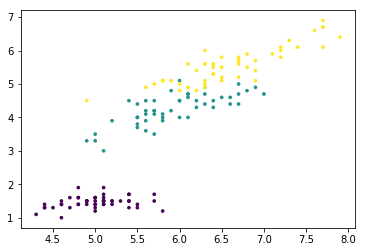

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("affiche")
print(X[0:10,0])
print(X[0:10,2])
# Visualisation
plt.figure()
plt.scatter(X[:,0], X[:,2], s=7, c=y)
plt.show()

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
1140.10010775446


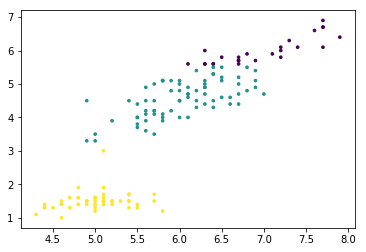

/ubs/soft/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in true_divide


ValueError: cannot convert float NaN to integer

In [8]:
def k_means_plusieurs_appel(data, nb_centroides, nb_appel):
    kmeans_result = []
    inertie_plus_petite = 0
    indice_appel_inertie_plus_basse = 0
    for i in range(nb_appel):
        kmeans_result.append(k_means(data,nb_centroides))
        inertie_plus_petite += kmeans_result[i][3]
    for i in range(nb_appel):
        if(kmeans_result[i][3] < inertie_plus_petite):
            inertie_plus_petite = kmeans_result[i][3]
            indice_appel_inertie_plus_basse = i
    return kmeans_result[indice_appel_inertie_plus_basse]
    
def k_means(data, nbCentroides):
    centroides = choixCentroides(data,nbCentroides)
    nb = 0
    nb_iterations = 100
    target = [-1 for col in range(data.shape[0])]
    old_target = [0 for col in range(data.shape[0])]
    old_centroides = [[-1 for col in range(data.shape[1])] for col in range(nbCentroides)]
    while centroides_different(centroides,old_centroides) and nb < nb_iterations : 
        old_target = target
        old_centroides = centroides
        for i in range(data.shape[0]): # pour chacun des points
            distance_centroides = np.asarray([0 for col in range(centroides.shape[0])])
            for j in range(centroides.shape[0]): # pour le nombre de centroides
                
                distsous = np.subtract(data[i],centroides[j])
                for k in range(distsous.shape[0]): # pour les x y z des centroides
                    distance_centroides[j] += np.power(distsous[k],2)
            min_dist = np.min(distance_centroides, axis=0)
            centroides_plus_proche = -1
            for j in range(distance_centroides.shape[0]):
                if distance_centroides[j] == min_dist:
                    centroides_plus_proche = j
            target[i] = centroides_plus_proche
        centroides = recalcul_centroides(data,nbCentroides,target)    
        nb += 1
    ret = []
    ret.append(centroides)
    ret.append(target)
    ret.append(nb-1)
    ret.append(inertie_intra_classe(centroides,data,target))
    return np.asarray(ret)


def inertie_intra_classe(centroides,data,target):
    ret = 0
    for i in range(centroides.shape[0]):
        for j in range(data.shape[0]):
            dist = 0
            distsous = np.subtract(data[j],centroides[i])
            for k in range(distsous.shape[0]):
                dist += np.power(distsous[k],2)            
            ret += np.sqrt(dist)
    return ret

def centroides_different(centroides, old_centroides):
    ret = False
    i=0
    c = np.asarray(centroides)
    old_c = np.asarray(old_centroides)
    while i < c.shape[0] and ret==False:
        for j in range(c[i].shape[0]):
            if(c[i][j] != old_c[i][j]):
                ret = True
        i+=1
    return ret

def recalcul_centroides(data,nb,target):
    ret = [[0 for col in range(data.shape[1])] for col in range(nb)] # initialize array with value 0
    nbPoints = [0 for col in range(nb)]
    for i in range(data.shape[0]):
        nbPoints[target[i]] += 1
        ret[target[i]] = np.add(ret[target[i]], data[i]) 
    for i in range(nb):
        ret[i] = np.true_divide(ret[i], nbPoints[i])
    return np.asarray(ret)

#Choissit les centroides dans le jeu de données du départ
def choixCentroides(data,nb):
    ret = [0 for col in range(nb)] # initialize array with value 0
    diff_centroides = [0 for col in range(nb)]
    for i in range(nb): 
        tmp = np.random.randint(0,data.shape[0])
        while(not_in_tab(tmp,diff_centroides) == False):
            tmp = np.random.uniform(0,data.shape[0])
        diff_centroides[i] = tmp
        ret[i] = np.asarray(data)[tmp]
    return np.asarray(ret)

def not_in_tab(nb,tab):
    ret = True
    for i in range(np.asarray(tab).shape[0]):
        if(nb == tab[i]):
            ret = False
    return ret
    
tab_ret = k_means(iris.data,3)
target = tab_ret[1]
print(target)
print(iris.target)
kmeans_multiple_appel = inertie_intra_classe(tab_ret[0],iris.data, tab_ret[1])
print(kmeans_multiple_appel)

plt.figure()
plt.scatter(X[:,0], X[:,2], s=7, c=target)
plt.show()

plusieurs_appel = k_means_plusieurs_appel(iris.data,3,10)
plt.figure()
plt.scatter(X[:,0], X[:,2], s=7, c=plusieurs_appel[1])
plt.show()